## Running SAM

Below, is a quickstart tutorial to analyze scRNA-seq data using SAM and visualize results.

In [1]:
from SAM import SAM

Initialize the SAM object with default values.

In [2]:
sam = SAM()

Load the data (by default, expects genes as rows and columns as cells)

In [3]:
sam.load_data('../example_data/GSE74596_data.csv.gz')

By default, 'load_data' outputs a pickle file ('_sparse.p') of the sparse data structure. This file is much faster to load than the csv file, especially for large datasets. To load this file,

In [4]:
sam.load_data('../example_data/GSE74596_data_sparse.p')

Log-normalize and filter the data:

In [ ]:
sam.preprocess_data()

We also have cell annotations we can load (optional),

In [5]:
sam.load_annotations('../example_data/GSE74596_ann.csv')

To run SAM using default parameters,

In [6]:
sam.run()

RUNNING SAM
Iteration: 0, Convergence: 0.5288079416624751
Iteration: 1, Convergence: 0.27299805514037856
Iteration: 2, Convergence: 0.019764119871655116
Iteration: 3, Convergence: 0.005829376712885454
Computing the UMAP embedding...
Elapsed time: 5.372451305389404 seconds


"\nDefault parameters (these hardly ever need to be changed):\n\nsam.run(max_iter=10,\n            verbose=True,\n            projection='umap',\n            n_genes=None,\n            npcs=None,\n            stopping_condition=5e-3,\n            num_norm_avg=50,\n            weight_PCs=True,\n            preprocessing='Normalizer'):\n"

SAM outputs a ranked list of genes. The genes are ordered by their respective weights (stored in `sam.weights`).

In [ ]:
print(sam.ranked_genes[:100]) #top 100 genes
"""
sam.ranked_genes is equivalent to below:

idx = np.argsort(-sam.weights)
ranked_genes = sam.all_gene_names[idx]
"""

All the important SAM objects and results are stored in `sam.output_vars` and `sam.adata`:

In [ ]:
#sam.output_vars
print(list(sam.output_vars.keys()) #list the dictionary keys in output_vars
sam.adata #the AnnData object

To visualize the resulting UMAP embedding:

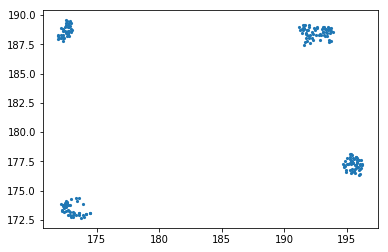

In [10]:
sam.scatter()

To visualize the UMAP embedding with our annotations overlaid:

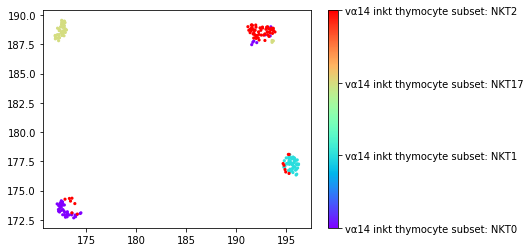

In [11]:
sam.scatter(c=sam.annotations)

To save the SAM object and all its contents into a Pickle file:

In [22]:
sam.save('example_save',dirname = 'output_directory')

To load a saved SAM object and all its contents:

In [23]:
sam=SAM(); #create an empty SAM object
sam.load('output_directory/example_save.p')

For more detailed tutorials, please see the other Jupyter notebooks.